El PCA es una técnica popular para reducción de dimensionalidad. Para decidir cuántos componentes retener, se utiliza el codo de la varianza explicada, que muestra la proporción de la varianza total que es capturada por cada componente principal.

En lugar de elegir el número de componentes arbitrariamente, puedes fijarte en la varianza explicada acumulada y buscar el punto donde ya no se agrega mucha varianza al incluir más componentes. Normalmente, se busca un umbral de varianza explicada (por ejemplo, 80-90%) y se retienen los componentes necesarios para alcanzar ese umbral.

```
(Jolliffe, I. T. (2002). Principal Component Analysis (Springer Series in Statistics).

Este es uno de los libros más conocidos sobre PCA. Jolliffe discute cómo la varianza explicada acumulada se usa para determinar cuántos componentes principales retener para capturar una proporción significativa de la varianza de los datos.)
```

 el objetivo principal de PCA es reducir la dimensionalidad de un conjunto de datos, preservando la mayor cantidad posible de "variabilidad". Esta variabilidad se cuantifica mediante la proporción de varianza total que cada componente principal explica

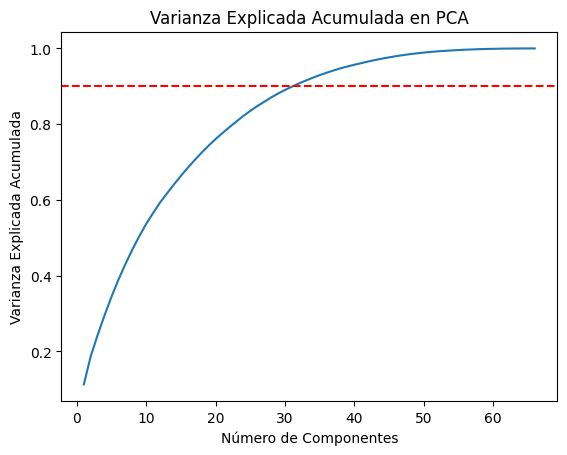

Se retendrán 32 componentes para explicar el 90% de la varianza.


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar el archivo de datos
df = pd.read_excel('preprocesado/datos_dauco_solo.xlsx')

# Aplicar PCA para reducir la dimensionalidad
X = df.values  # Usamos todas las columnas como variables independientes

# Normalizar los datos (opcional pero recomendado para PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Graficar la varianza explicada acumulada para decidir cuántos componentes mantener
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada en PCA')
plt.axhline(y=0.90, color='r', linestyle='--')  # Línea para ver el umbral del 90%
plt.show()

# Elegir el número de componentes para explicar el 90% de la varianza
components_to_retain = next(i for i, v in enumerate(cumulative_variance) if v >= 0.90) + 1
print(f"Se retendrán {components_to_retain} componentes para explicar el 90% de la varianza.")


Normalización: Se normalizan los datos antes de aplicar PCA, ya que es una buena práctica para que las variables con diferentes escalas no influyan más que otras.

K-means: Aplicamos K-means a los datos reducidos, con un número inicial de clusters k=5. Puedes experimentar con diferentes valores de k dependiendo del número de grupos que quieras identificar.

In [1]:
# Reducir la dimensionalidad a los componentes seleccionados
pca = PCA(n_components=components_to_retain)
X_reduced = pca.fit_transform(X_scaled)

# Aplicar K-means para agrupar los datos
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)  # Puedes probar con diferentes valores de k
kmeans.fit(X_reduced)

# Añadir las etiquetas de los clusters al DataFrame original
df['Cluster'] = kmeans.labels_

# Guardar el DataFrame con la columna 'Cluster' en un archivo Excel
df.to_excel(f'clusters/{num_clusters}_clusters_{components_to_retain}_components.xlsx', index=False)

# Mostrar las primeras filas para verificar
print(df.head())

# Visualizar los primeros dos componentes para observar los clusters
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Visualización de los Clusters')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

NameError: name 'PCA' is not defined

Método del Codo

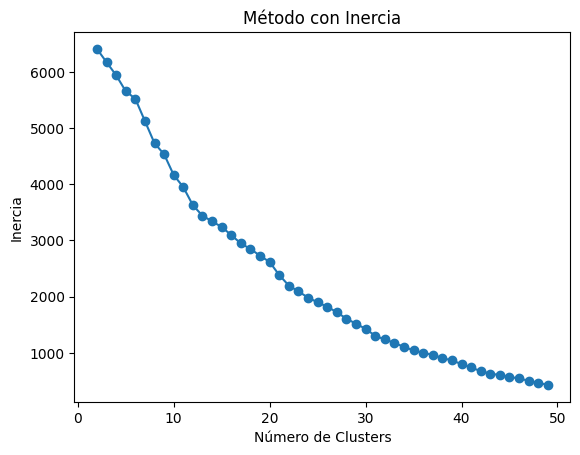

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Aplicar K-means para diferentes valores de k
inertia = []
k_range = range(2, 50)  # Probar entre 1 y 10 clusters (puedes ajustarlo)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)  # Utiliza los datos reducidos por PCA
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Método de la silueta

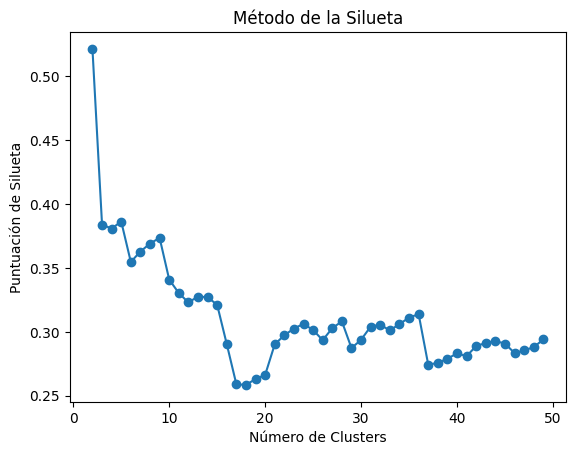

El número óptimo de clusters según el método de la silueta es 2 con 0.5211364310284367


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 50)  # Comenzamos desde 2 clusters, ya que para 1 no tiene sentido

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    score = silhouette_score(X_reduced, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar los resultados de la silueta
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of CLusters')
plt.ylabel('Silhouette Punctuation')
plt.title('Silhouette Method')
plt.show()

# Imprimir el número de clusters que da la mejor puntuación
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f'El número óptimo de clusters según el método de la silueta es {best_k} con {max(silhouette_scores)}')


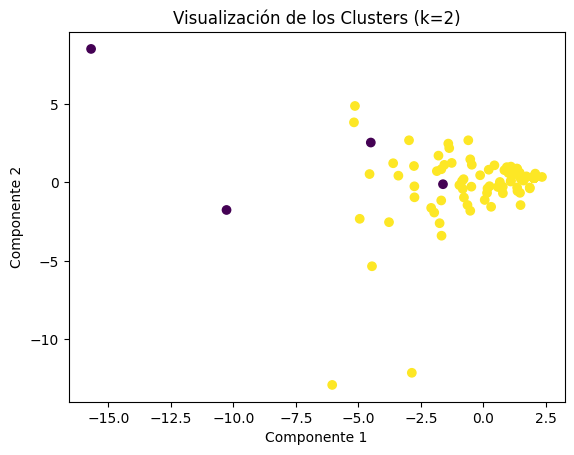

   A102  A105  A132  A140  A142  A32  A325  A326  A68  A69  ...  S37  S42  S5  \
0     1     1     1     1     1    1     1     1    1    1  ...    1    1   1   
1     1     1     1     1     1    1     1     1    1    1  ...    1    1   1   
2     1     1     1     1     1    1     1     1    1    1  ...    1    1   1   
3     1     1     1     1     1    1     1     1    1    1  ...    1    1   1   
4     1     0     1     1     1    1     1     1    1    1  ...    0    1   1   

   S6  S74  S76  S79  S9  S91  Cluster  
0   1    1    1    1   1    1        1  
1   1    1    1    1   1    1        1  
2   1    1    1    1   1    1        1  
3   1    1    1    1   1    1        1  
4   1    1    1    1   1    1        1  

[5 rows x 67 columns]


In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar K-means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_reduced)  # Utilizamos los datos reducidos por PCA

# Añadir las etiquetas de los clusters al DataFrame original
df['Cluster'] = kmeans.labels_

# Guardar el resultado en un archivo Excel
df.to_excel('datos_dauco_variables_con_clusters_2.xlsx', index=False)

# Visualizar los dos primeros componentes para ver la separación de los clusters
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Visualización de los Clusters (k=2)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

# Mostrar algunas filas del DataFrame con los clusters asignados
print(df.head())
